CNN Model

In [14]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import EarlyStopping

import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix

Load CIFAR-10 dataset and normalise the pixel values to between 0 and 1. 

The data is categorised into two main groups training and testing data, sub-categories of these being the images themselves, and their respective labels.

In [15]:
# Load dataset
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.cifar10.load_data()

# Preprocessing: Normalise data
train_images = train_images / 255.0
test_images = test_images / 255.0
train_labels = tf.keras.utils.to_categorical(train_labels)
test_labels = tf.keras.utils.to_categorical(test_labels)

Here, the model architecture is defined.

Below has three convolutional layers with two pooling layers between the first two. A flatten layer is used to manipulate the tensor to the right dimension before two dense (fully-connected) layers. Between is the location for the added dense layer in the appropriate configurations. 

ReLu is largely used as the activation function but softmax is introduced for the final dense layer.

In [16]:
# Model architecture:
    # 3 convolutional layers followed by pooling layers after each
    # flatten layer
    # 2 dense layers (optional dropout layer between)
model = models.Sequential([
    layers.Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), padding='same', activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(128, (3,3), padding='same', activation='relu'),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),  # Add a dropout layer
    layers.Dense(10, activation='softmax')
])


Metrics are defined for model evaluation and the model is compiled. The Adam optimiser is used as well as categorical crossentropy as the loss function.

In [17]:
# compile
metrics = [
    tf.keras.metrics.BinaryAccuracy(name='accuracy'),
    tf.keras.metrics.Precision(name='precision'),
    tf.keras.metrics.Recall(name='recall'),
    tf.keras.metrics.AUC(name='auc')
]

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=metrics)

Display a summary of the model's architecture

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 conv2d_11 (Conv2D)          (None, 16, 16, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 8, 8, 64)         0         
 2D)                                                             
                                                                 
 conv2d_12 (Conv2D)          (None, 8, 8, 128)         73856     
                                                                 
 flatten_1 (Flatten)         (None, 8192)              0

Tensorflows early stop function can be added to prevent overfitting. Below defines that if the validation loss does not improve in three epochs, training will end and the best weights will be restored for evaluation.

In [ ]:
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

Next is to train the model. Once the model is trained, the configured model is evaluated using the test data. 
Parameters validation_split and callbacks are added for the purposes of the early stop function.

In [4]:
# Train

#history = model.fit(train_images, train_labels, epochs=15, batch_size=64, validation_data=(test_images, test_labels))

# Early stop version
history = model.fit(train_images, train_labels, epochs=20, batch_size=64, validation_data=(test_images, test_labels), validation_split=0.2, callbacks=[early_stop])




Epoch 1/20
782/782 [==============================] - 86s 105ms/step - loss: 1.6044 - accuracy: 0.9087 - precision: 0.6645 - recall: 0.1752 - auc: 0.8477 - val_loss: 1.2021 - val_accuracy: 0.9240 - val_precision: 0.7878 - val_recall: 0.3290 - val_auc: 0.9214
Epoch 2/20
782/782 [==============================] - 78s 100ms/step - loss: 1.2104 - accuracy: 0.9251 - precision: 0.7440 - recall: 0.3820 - auc: 0.9169 - val_loss: 1.0072 - val_accuracy: 0.9344 - val_precision: 0.7918 - val_recall: 0.4670 - val_auc: 0.9441
Epoch 3/20
782/782 [==============================] - 78s 100ms/step - loss: 1.0262 - accuracy: 0.9353 - precision: 0.7843 - recall: 0.4875 - auc: 0.9401 - val_loss: 0.8857 - val_accuracy: 0.9423 - val_precision: 0.8346 - val_recall: 0.5282 - val_auc: 0.9572
Epoch 4/20
782/782 [==============================] - 79s 101ms/step - loss: 0.9143 - accuracy: 0.9421 - precision: 0.8050 - recall: 0.5560 - auc: 0.9522 - val_loss: 0.8322 - val_accuracy: 0.9469 - val_precision: 0.8296 - v

Below are various ways of representing the metrics gathered about the model's performance (see comments for specifics)

In [7]:
# Print the values of the metrics specified when compiling the model
test_loss, test_acc, test_precision, test_recall, test_auc = model.evaluate(test_images, test_labels)
print('Test loss:', test_loss)
print('Test accuracy:', test_acc)
print('Test precision:', test_precision)
print('Test recall:', test_recall)
print('Test AUC:', test_auc)


313/313 [==============================] - 6s 19ms/step - loss: 0.7448 - accuracy: 0.9547 - precision: 0.8144 - recall: 0.7088 - auc: 0.9671
Test loss: 0.7447831630706787
Test accuracy: 0.9547299742698669
Test precision: 0.8144317865371704
Test recall: 0.7088000178337097
Test AUC: 0.9671364426612854


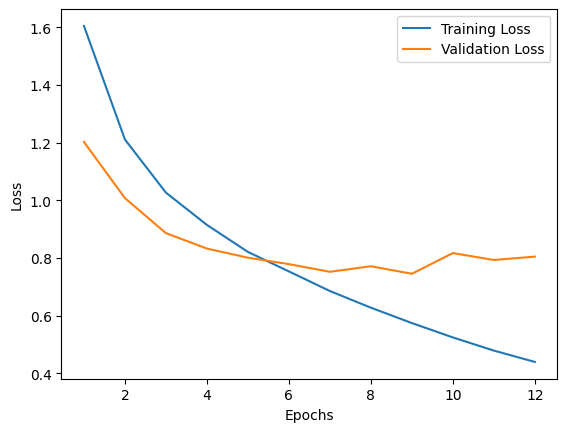

In [5]:
# Plot training and validation loss (useful for evaluating possible overfitting)
train_loss = np.array(history.history['loss'])
val_loss = np.array(history.history['val_loss'])

epochs = np.arange(1, len(train_loss)+1)

plt.plot(epochs, train_loss, label='Training Loss')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

313/313 [==============================] - 6s 19ms/step


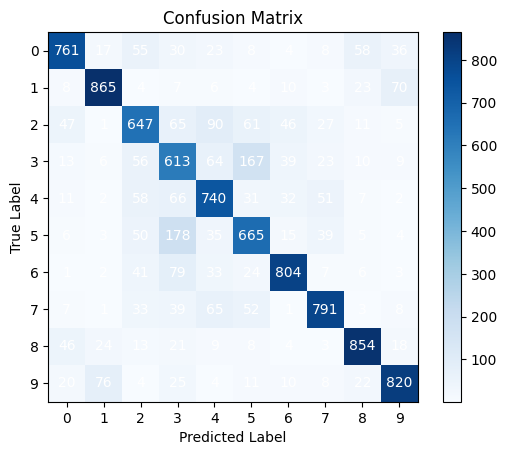

In [8]:
# Plot confusion matrix

# Get predictions for testing images
y_pred = model.predict(test_images)

# Convert the test_labels and y_pred_labels to an array of integers
y_pred_labels = np.argmax(y_pred, axis=1)
test_labels = np.argmax(test_labels, axis=1)

cm = confusion_matrix(test_labels, y_pred_labels)

plt.imshow(cm, cmap='Blues')
plt.title('Confusion Matrix')
plt.colorbar()
plt.xticks(np.arange(10))
plt.yticks(np.arange(10))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

for i in range(10):
    for j in range(10):
        plt.text(j, i, str(cm[i,j]), ha='center', va='center', color='white')

plt.show()


ResNet18 Model

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import EarlyStopping

from sklearn.metrics import confusion_matrix

In [2]:
# Load dataset
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.cifar10.load_data()

# Preprocessing: Normalise data
train_images = train_images / 255.0
test_images = test_images / 255.0
train_labels = tf.keras.utils.to_categorical(train_labels)
test_labels = tf.keras.utils.to_categorical(test_labels)

In [3]:
def identity_block(x, filter):
    # copy tensor to variable called x_skip
    x_skip = x
    # Layer 1
    x = tf.keras.layers.Conv2D(filter, (3,3), padding = 'same')(x)
    x = tf.keras.layers.BatchNormalization(axis=3)(x)
    x = tf.keras.layers.Activation('relu')(x)
    # Layer 2
    x = tf.keras.layers.Conv2D(filter, (3,3), padding = 'same')(x)
    x = tf.keras.layers.BatchNormalization(axis=3)(x)
    # Add Residue
    x = tf.keras.layers.Add()([x, x_skip])     
    x = tf.keras.layers.Activation('relu')(x)
    return x

In [4]:
def convolutional_block(x, filter):
    # copy tensor to variable called x_skip
    x_skip = x
    # Layer 1
    x = tf.keras.layers.Conv2D(filter, (3,3), padding = 'same', strides = (2,2))(x)
    x = tf.keras.layers.BatchNormalization(axis=3)(x)
    x = tf.keras.layers.Activation('relu')(x)
    # Layer 2
    x = tf.keras.layers.Conv2D(filter, (3,3), padding = 'same')(x)
    x = tf.keras.layers.BatchNormalization(axis=3)(x)
    # Processing Residue with conv(1,1)
    x_skip = tf.keras.layers.Conv2D(filter, (1,1), strides = (2,2))(x_skip)
    # Add Residue
    x = tf.keras.layers.Add()([x, x_skip])     
    x = tf.keras.layers.Activation('relu')(x)
    return x

In [5]:
def ResNet18(shape = (32, 32, 3), classes = 10):
    # Step 1 (Setup Input Layer)
    x_input = tf.keras.layers.Input(shape)
    x = tf.keras.layers.ZeroPadding2D((3, 3))(x_input)
    # Step 2 (Initial Conv layer along with maxPool)
    x = tf.keras.layers.Conv2D(64, kernel_size=7, strides=2, padding='same')(x)
    x = tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.layers.Activation('relu')(x)
    x = tf.keras.layers.MaxPool2D(pool_size=3, strides=2, padding='same')(x)
    # Define size of sub-blocks and initial filter size
    block_layers = [2, 2, 2, 2]
    filter_size = 64
    # Step 3 Add the Resnet Blocks
    for i in range(2):
        if i == 0:
            # For sub-block 1 Residual/Convolutional block not needed
            for j in range(block_layers[i]):
                x = identity_block(x, filter_size)
        else:
            # One Residual/Convolutional Block followed by Identity blocks
            # The filter size will go on increasing by a factor of 2
            filter_size = filter_size*2
            x = convolutional_block(x, filter_size)
            for j in range(block_layers[i] - 1):
                x = identity_block(x, filter_size)
    # Step 4 End Dense Network
    x = tf.keras.layers.AveragePooling2D((2,2), padding = 'same')(x)
    x = tf.keras.layers.Flatten()(x)
    x = tf.keras.layers.Dense(512, activation = 'relu')(x)
    x = tf.keras.layers.Dropout(0.5)(x)
    x = tf.keras.layers.Dense(classes, activation = 'softmax')(x)
    model = tf.keras.models.Model(inputs = x_input, outputs = x, name = "ResNet18")
    return model

In [6]:
model = ResNet18()
metrics = [
    tf.keras.metrics.BinaryAccuracy(name='accuracy'),
    tf.keras.metrics.Precision(name='precision'),
    tf.keras.metrics.Recall(name='recall'),
    tf.keras.metrics.AUC(name='auc')
]

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=metrics)

In [7]:
model.summary()

Model: "ResNet18"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 32, 32, 3)]  0           []                               
                                                                                                  
 zero_padding2d (ZeroPadding2D)  (None, 38, 38, 3)   0           ['input_1[0][0]']                
                                                                                                  
 conv2d (Conv2D)                (None, 19, 19, 64)   9472        ['zero_padding2d[0][0]']         
                                                                                                  
 batch_normalization (BatchNorm  (None, 19, 19, 64)  256         ['conv2d[0][0]']                 
 alization)                                                                                

                                                                                                  
 activation_8 (Activation)      (None, 5, 5, 128)    0           ['add_3[0][0]']                  
                                                                                                  
 average_pooling2d (AveragePool  (None, 3, 3, 128)   0           ['activation_8[0][0]']           
 ing2D)                                                                                           
                                                                                                  
 flatten (Flatten)              (None, 1152)         0           ['average_pooling2d[0][0]']      
                                                                                                  
 dense (Dense)                  (None, 512)          590336      ['flatten[0][0]']                
                                                                                                  
 dropout (

In [8]:
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

In [9]:
def visualize_results(history):
  figure = plt.figure(figsize=(15, 10))
  plt.subplot(211)
  plt.title('Cross Entropy Loss')
  plt.plot(history.history['loss'], color='blue', label='train')
  plt.plot(history.history['val_loss'], color='orange', label='test')
  # plot accuracy
  plt.subplot(212)
  plt.title('Classification Accuracy')
  plt.plot(history.history['accuracy'], color='blue', label='train')
  plt.plot(history.history['val_accuracy'], color='orange', label='test')

Epoch 1/20
782/782 [==============================] - 217s 260ms/step - loss: 1.5696 - accuracy: 0.9100 - precision: 0.6482 - recall: 0.2196 - auc: 0.8574 - val_loss: 1.4857 - val_accuracy: 0.9130 - val_precision: 0.6315 - val_recall: 0.3111 - val_auc: 0.8745
Epoch 2/20
782/782 [==============================] - 378s 484ms/step - loss: 1.1643 - accuracy: 0.9281 - precision: 0.7456 - recall: 0.4258 - auc: 0.9229 - val_loss: 1.3993 - val_accuracy: 0.9175 - val_precision: 0.6223 - val_recall: 0.4445 - val_auc: 0.8990
Epoch 3/20
782/782 [==============================] - 202s 258ms/step - loss: 0.9686 - accuracy: 0.9398 - precision: 0.7901 - recall: 0.5415 - auc: 0.9461 - val_loss: 1.2450 - val_accuracy: 0.9297 - val_precision: 0.7151 - val_recall: 0.4934 - val_auc: 0.9141
Epoch 4/20
782/782 [==============================] - 197s 252ms/step - loss: 0.8327 - accuracy: 0.9482 - precision: 0.8189 - recall: 0.6189 - auc: 0.9593 - val_loss: 1.1899 - val_accuracy: 0.9304 - val_precision: 0.6855

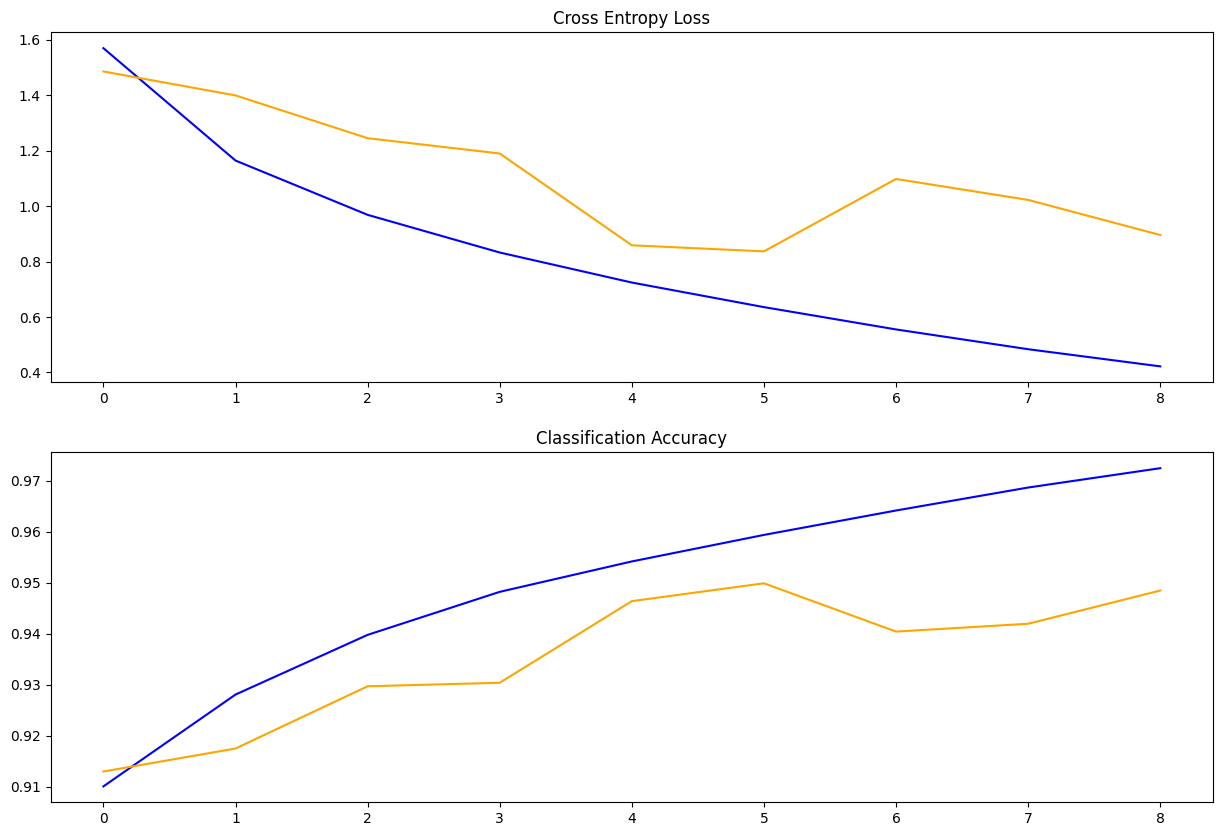

In [10]:
history = model.fit(train_images, train_labels, validation_data=(test_images, test_labels), epochs = 20, batch_size=64, validation_split=0.2, callbacks=[early_stop])

visualize_results(history)

In [11]:
# Evaluate model
test_loss, test_acc, test_precision, test_recall, test_auc = model.evaluate(test_images, test_labels)
print('Test loss:', test_loss)
print('Test accuracy:', test_acc)
print('Test precision:', test_precision)
print('Test recall:', test_recall)
print('Test AUC:', test_auc)

313/313 [==============================] - 13s 40ms/step - loss: 0.8368 - accuracy: 0.9499 - precision: 0.7955 - recall: 0.6714 - auc: 0.9589
Test loss: 0.8368407487869263
Test accuracy: 0.9498800039291382
Test precision: 0.7954976558685303
Test recall: 0.6714000105857849
Test AUC: 0.9589083194732666


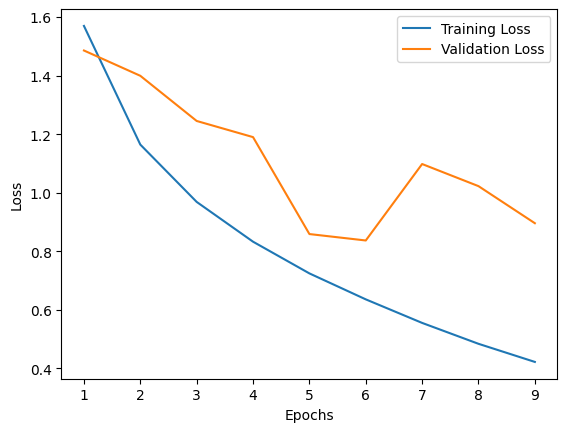

In [12]:
# Plot training and validation loss
train_loss = np.array(history.history['loss'])
val_loss = np.array(history.history['val_loss'])

epochs = np.arange(1, len(train_loss)+1)

plt.plot(epochs, train_loss, label='Training Loss')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

313/313 [==============================] - 15s 41ms/step


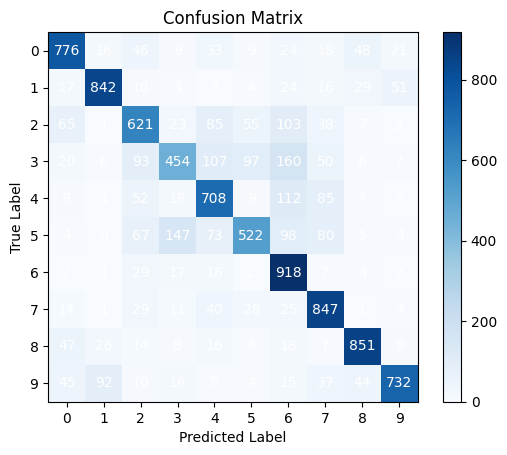

In [13]:
# Plot confusion matrix

y_pred = model.predict(test_images)
y_pred_labels = np.argmax(y_pred, axis=1)

# Convert the test_labels to an array of integers
test_labels = np.argmax(test_labels, axis=1)

cm = confusion_matrix(test_labels, y_pred_labels)

plt.imshow(cm, cmap='Blues')
plt.title('Confusion Matrix')
plt.colorbar()
plt.xticks(np.arange(10))
plt.yticks(np.arange(10))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

for i in range(10):
    for j in range(10):
        plt.text(j, i, str(cm[i,j]), ha='center', va='center', color='white')

plt.show()